# Data Preprocessing

In [17]:
# Import Package
import pandas as pd
import numpy as np

## For format
from bs4 import BeautifulSoup
import re

## For normalization
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


## Import data

In [7]:
data = pd.read_csv('./IMDB Dataset.csv',quotechar='"',on_bad_lines='skip')
data.head()

,review,sentiment,review_format
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictures painted for mainstream audiences forget charm forget romanceOZ doesnt mess around The first episode I ever saw struck me as so nasty it was surreal I couldnt say I was ready for it but as I watched more I developed a taste for Oz and got accustomed to the high levels of graphic violence Not just violence but injustice Watching Oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' t

## Processing by text formatting

In [4]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the noise:
def remove_parentheses(text):
    text = re.sub("\[[^]]*\]","",text)
    text = re.sub(r'\([^)]*\)', '', text)
    return text

# Removing special character
def remove_special_character(text):
    text = re.sub(r'[^A-Za-z0-9\s]','',text)
    return text

# Aggregated Remove
def remove_noise(text):
    text = strip_html(text)
    text = remove_parentheses(text)
    text = remove_special_character(text)
    return text

In [5]:
data['review_format']=data['review'].apply(remove_noise)

<ipython-input-4-c825cbba5d79>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [14]:
pd.set_option('display.max_colwidth', None)
data[["review","review_format"]].sample(1)

,review,review_format
22932,"I saw this recently with my wife and discovered it's better than Caine believes, although it's not much cop. Britain's greatest ever screen actor does not seem too interested in this role, which is a pity as he might have elevated it with more conviction in his playing. Rex Harrison seems even less bothered, perhaps unsurprisingly, as his character is very poorly written. William Holden is better, but his screen time is fleeting and, again, his character is not well scripted.<br /><br />Beverly Johnson is as beautiful a woman as I have ever seen, but is given very little to do, the film might have gained a great deal by concentrating more on her story. Ustinov steals the show, but basically by playing a comic character quite out of keeping with the film's serious tone. The music is poor and Omar Sharif makes one of his many pointless cameos (his career has been based on this for decades now).<br /><br />Richard Fleischer has to be blamed for not directing this more effectively, he was an infuriatingly unpredictable film director, and this is one of his weaker movies.",I saw this recently with my wife and discovered its better than Caine believes although its not much cop Britains greatest ever screen actor does not seem too interested in this role which is a pity as he might have elevated it with more conviction in his playing Rex Harrison seems even less bothered perhaps unsurprisingly as his character is very poorly written William Holden is better but his screen time is fleeting and again his character is not well scriptedBeverly Johnson is as beautiful a woman as I have ever seen but is given very little to do the film might have gained a great deal by concentrating more on her story Ustinov steals the show but basically by playing a comic character quite out of keeping with the films serious tone The music is poor and Omar Sharif makes one of his many pointless cameos Richard Fleischer has to be blamed for not directing this more effectively he was an infuriatingly unpredictable film director and this is one of his weaker movies


## Processing by normalization

In [51]:
# Remove Stop Words & Lowercasing
nltk.download('stopwords')
stop = set(word.lower() for word in stopwords.words('english'))
data['review_normalization'] = data['review_format'].apply(lambda x: " ".join(word.lower() for word in x.split() if word.lower() not in stop))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# # Stemmer
# Change word into stem
porter=PorterStemmer()

def Stemmer_porter(text):
    stemmer_text = " ".join(porter.stem(word) for word in text.split())
    return stemmer_text

data['review_normalization']=data['review_normalization'].apply(Stemmer_porter)
data[["review","review_format","review_normalization"]].sample(1)

,review,review_format,review_normalization
45477,"I was really looking forward to watching this documentary on what I considered to be some of the most entertaining films ever made. Growing up in L.A. during the 60's many of these old black and white films were shown on the local stations. I even remember a Friday night show called ""Strange Tales of Science Fiction"" that showcased a different Sci Fi flick every week. This documentary however spent way too much time on the opinions of the four famous filmmakers and how they felt about the classic movies of that genre and how they used them as inspiration in their filmaking.<br /><br />That is not what I was hoping for in this documentary. It really could have been a comprehensive examination of the decade instead of a brief highlighting of the most well known films of the era. Anyone who has studied or been interested in these films are pretty familiar with standouts such as War of the Worlds, Forbidden Planet, The Thing, The Day the Earth Stood Still, etc. I would have liked to see some excerpts from lesser known films and perhaps some interviews with people involved in the making of these movies. I would have to agree the documentary was way too focused on Spielberg's opinions and was a type of commercial for his new release of War of the Worlds.",I was really looking forward to watching this documentary on what I considered to be some of the most entertaining films ever made Growing up in LA during the 60s many of these old black and white films were shown on the local stations I even remember a Friday night show called Strange Tales of Science Fiction that showcased a different Sci Fi flick every week This documentary however spent way too much time on the opinions of the four famous filmmakers and how they felt about the classic movies of that genre and how they used them as inspiration in their filmakingThat is not what I was hoping for in this documentary It really could have been a comprehensive examination of the decade instead of a brief highlighting of the most well known films of the era Anyone who has studied or been interested in these films are pretty familiar with standouts such as War of the Worlds Forbidden Planet The Thing The Day the Earth Stood Still etc I would have liked to see some excerpts from lesser known films and perhaps some interviews with people involved in the making of these movies I would have to agree the documentary was way too focused on Spielbergs opinions and was a type of commercial for his new release of War of the Worlds,realli look forward watch documentari consid entertain film ever made grow la 60 mani old black white film shown local station even rememb friday night show call strang tale scienc fiction showcas differ sci fi flick everi week documentari howev spent way much time opinion four famou filmmak felt classic movi genr use inspir filmakingthat hope documentari realli could comprehens examin decad instead brief highlight well known film era anyon studi interest film pretti familiar standout war world forbidden planet thing day earth stood still etc would like see excerpt lesser known film perhap interview peopl involv make movi would agre documentari way focus spielberg opinion type commerci new releas war world


# Exploration Data Analysis

In [20]:
# Import Package
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [26]:
def show_wordcloud(wordcloud_positive,wordcloud_negative,title = None):
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    ax[0].axis("off")
    ax[0].imshow(wordcloud_positive)
    ax[0].title.set_text('Positive Words')

    ax[1].axis("off")
    ax[1].imshow(wordcloud_negative)
    ax[1].title.set_text('Negative Words')

    plt.tight_layout(pad=5)
    plt.show()

In [19]:
positive_text = data.loc[data["sentiment"] == "positive","review_normalization"].tolist()
negative_text = data.loc[data["sentiment"] == "negative","review_normalization"].tolist()
negative_text  = ' '.join(negative_text)
positive_text = ' '.join(positive_text)

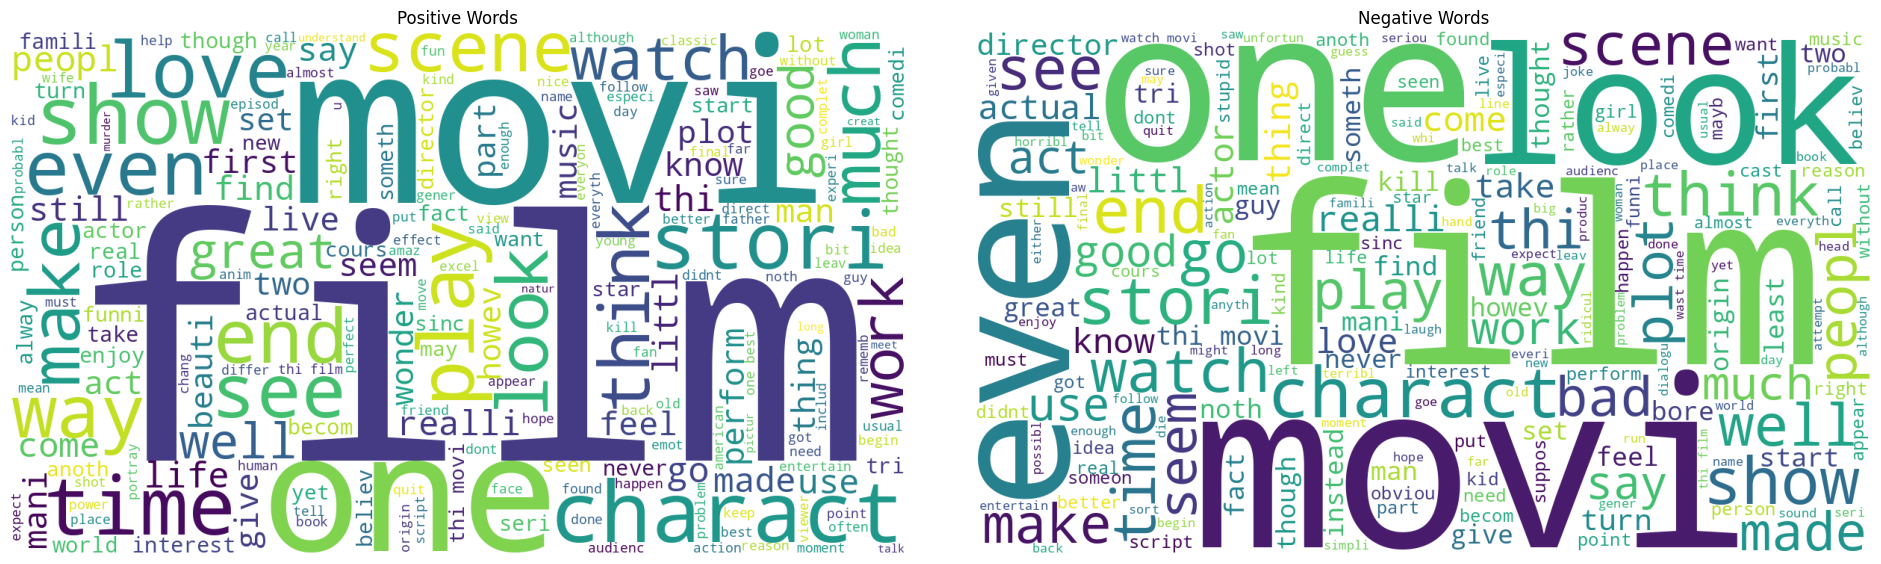

In [25]:

wordcloud_positive = WordCloud(width=1200, height=700,
                                background_color='white',
                                min_font_size=10).generate(positive_text)


wordcloud_negative = WordCloud(width=1200, height=700,
                                background_color='white',
                                min_font_size=10).generate(negative_text)
show_wordcloud(wordcloud_positive,wordcloud_negative)

In [27]:
# Complement Set
negative_text = set(negative_text.split())
positive_text = set(positive_text.split())
negative = negative_text - positive_text
positive = positive_text - negative_text

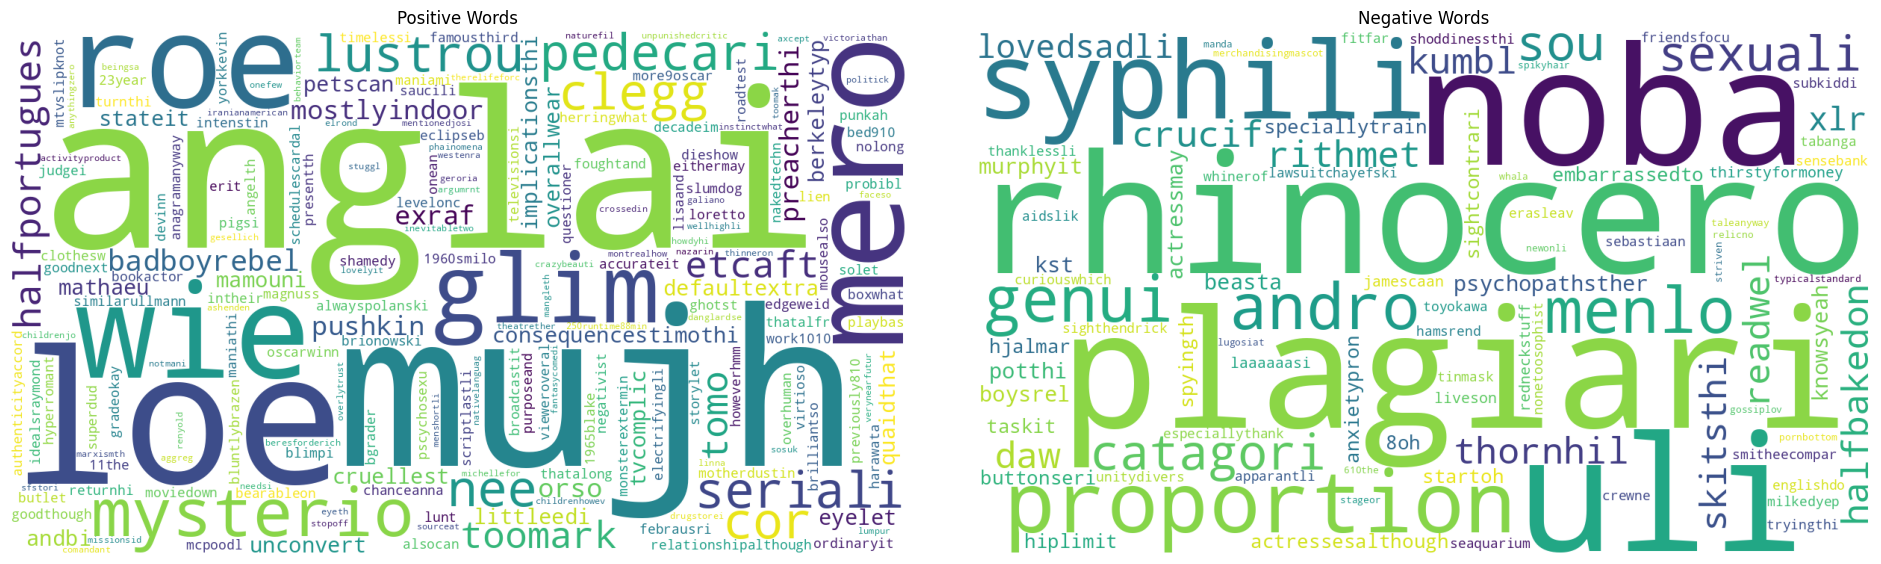

In [28]:
wordcloud_negative = WordCloud(width=1200, height=700,
                                background_color='white',
                                min_font_size=10).generate(' '.join(negative))

wordcloud_positive = WordCloud(width=1200, height=700,
                                background_color='white',
                                min_font_size=10).generate(' '.join(positive))

show_wordcloud(wordcloud_positive,wordcloud_negative)

# Split Dataset

In [31]:
# Import package
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(data["review_normalization"],data["sentiment"],test_size=0.2,random_state=42)

# Feature Extraction

In [29]:
# Import Package
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

## Bag of words(CountVextorize)

In [68]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.1,max_df=0.9,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews=cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 110)
BOW_cv_test: (10000, 110)


In [55]:
print(cv.get_feature_names_out())

['acting' 'actors' 'actually' 'almost' 'also' 'another' 'around' 'back'
 'bad' 'best' 'better' 'big' 'cant' 'cast' 'character' 'characters' 'come'
 'could' 'didnt' 'director' 'doesnt' 'dont' 'end' 'enough' 'even' 'ever'
 'every' 'fact' 'film' 'films' 'find' 'first' 'funny' 'get' 'gets' 'give'
 'go' 'going' 'good' 'got' 'great' 'however' 'im' 'interesting' 'ive'
 'know' 'life' 'like' 'little' 'long' 'look' 'lot' 'love' 'made' 'make'
 'makes' 'man' 'many' 'may' 'movie' 'movies' 'much' 'must' 'never' 'new'
 'nothing' 'old' 'one' 'part' 'people' 'plot' 'pretty' 'quite' 'real'
 'really' 'right' 'saw' 'say' 'scene' 'scenes' 'see' 'seems' 'seen' 'show'
 'something' 'still' 'story' 'take' 'thats' 'thing' 'things' 'think'
 'though' 'thought' 'time' 'times' 'two' 'us' 'want' 'watch' 'watching'
 'way' 'well' 'whole' 'without' 'work' 'world' 'would' 'years' 'young']


In [69]:
cv_feature = pd.DataFrame.sparse.from_spmatrix(cv_train_reviews,
                                  index=X_train.index,
                                  columns=cv.get_feature_names_out())
cv_feature_mean = cv_feature.mean(axis=0).sort_values(ascending=False)
cv_feature_mean.head(10)

,0
movie,1
film,1
acting,0
pretty,0
seems,0
see,0
scenes,0
scene,0
say,0
saw,0


<Axes: >

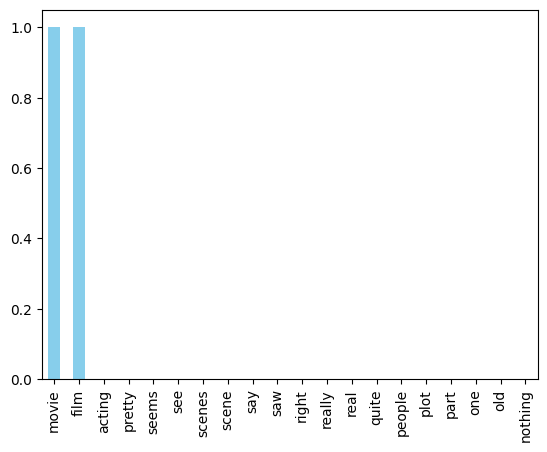

In [70]:
cv_feature_mean[:20].plot(kind='bar',color="skyblue")

## Term Frequency and Inverse Document Frequency (TF-IDF)

In [63]:
tfidf=TfidfVectorizer(min_df=0.1,max_df=0.85,use_idf=True,norm='l2',smooth_idf=True)
tf_train_reviews =tfidf.fit_transform(X_train)
tf_test_reviews =tfidf.transform(X_test)

In [64]:
tfidf.get_feature_names_out()

array(['acting', 'actors', 'actually', 'almost', 'also', 'another',
       'around', 'back', 'bad', 'best', 'better', 'big', 'cant', 'cast',
       'character', 'characters', 'come', 'could', 'didnt', 'director',
       'doesnt', 'dont', 'end', 'enough', 'even', 'ever', 'every', 'fact',
       'film', 'films', 'find', 'first', 'funny', 'get', 'gets', 'give',
       'go', 'going', 'good', 'got', 'great', 'however', 'im',
       'interesting', 'ive', 'know', 'life', 'like', 'little', 'long',
       'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many',
       'may', 'movie', 'movies', 'much', 'must', 'never', 'new',
       'nothing', 'old', 'one', 'part', 'people', 'plot', 'pretty',
       'quite', 'real', 'really', 'right', 'saw', 'say', 'scene',
       'scenes', 'see', 'seems', 'seen', 'show', 'something', 'still',
       'story', 'take', 'thats', 'thing', 'things', 'think', 'though',
       'thought', 'time', 'times', 'two', 'us', 'want', 'watch',
       'watching', 'way', 'we

In [71]:
tf_feature = pd.DataFrame.sparse.from_spmatrix(tf_train_reviews,
                                  index=X_train.index,
                                  columns=tfidf.get_feature_names_out())
tf_feature_mean = tf_feature.mean(axis=0).sort_values(ascending=False)
tf_feature_mean.head(10)

,0
movie,0.149700
film,0.136072
one,0.090209
like,0.074995
good,0.065403
story,0.057629
would,0.056307
time,0.054924
really,0.054721
even,0.054459


<Axes: >

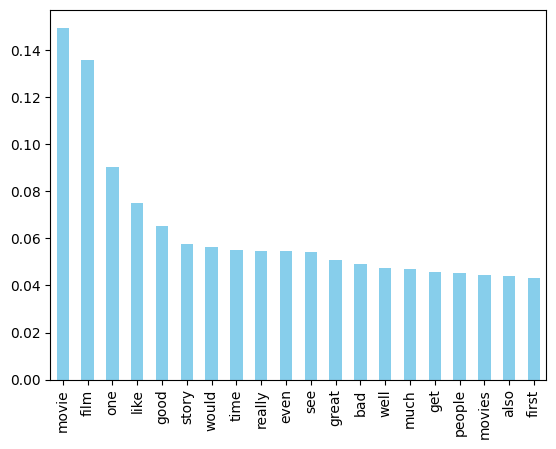

In [72]:
tf_feature_mean[:20].plot(kind='bar',color="skyblue")

## Word Embedding

# Modeling

# Metrics